### Hypothesis

Using Historical data from the last x months (6). I want to see how well can I predict a sales price of a house in the area (Postcodes limited to dataset).



# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.dates as mdates

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.ticker import FuncFormatter

In [2]:
hist_data = 'data/csv_data_clean/london_historical.csv' 
curr_data = 'data/csv_data_clean/london_current.csv' 

In [3]:
hist_df = pd.read_csv(hist_data)

# HISTORICAL DATA EDA

In [4]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308346 entries, 0 to 308345
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   address              308346 non-null  object 
 1   unprocessed_address  308346 non-null  object 
 2   paon                 308346 non-null  object 
 3   saon                 308346 non-null  object 
 4   postcode             308346 non-null  object 
 5   bedrooms             308346 non-null  float64
 6   bathrooms            308344 non-null  float64
 7   lounges              308346 non-null  int64  
 8   url                  308346 non-null  object 
 9   tenure               232385 non-null  object 
 10  property_type        282026 non-null  object 
 11  month_sold_last      176239 non-null  object 
 12  year_sold_last       176239 non-null  float64
 13  last_sold_price_gbp  176239 non-null  float64
 14  min_estimate_gbp     308108 non-null  float64
 15  max_estimate_gbp 

### DROPPING NULL SALES

#### About half the properties did not have complete data 
dropped about 150k rows

In [5]:
hist_df.dropna(subset=['month_sold_last','year_sold_last','last_sold_price_gbp'], inplace=True)

In [6]:
hist_df.dropna(subset=['tenure','property_type'], inplace=True)

In [7]:
hist_df.dropna(inplace=True)

In [8]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173590 entries, 2 to 308342
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   address              173590 non-null  object 
 1   unprocessed_address  173590 non-null  object 
 2   paon                 173590 non-null  object 
 3   saon                 173590 non-null  object 
 4   postcode             173590 non-null  object 
 5   bedrooms             173590 non-null  float64
 6   bathrooms            173590 non-null  float64
 7   lounges              173590 non-null  int64  
 8   url                  173590 non-null  object 
 9   tenure               173590 non-null  object 
 10  property_type        173590 non-null  object 
 11  month_sold_last      173590 non-null  object 
 12  year_sold_last       173590 non-null  float64
 13  last_sold_price_gbp  173590 non-null  float64
 14  min_estimate_gbp     173590 non-null  float64
 15  max_estimate_gbp 

### Creating BROMLEY AND CROYDON DATA

### Adding numerical month column and splitting postcodes

In [9]:
month_strings = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_nums = [1,2,3,4,5,6,7,8,9,10,11,12]

month_dict = {month_str:num for month_str, num in zip(month_strings, month_nums)}

month_dict

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [10]:
hist_df['num_month_sold_last'] = hist_df[['month_sold_last']].applymap(lambda x: month_dict[x] if x in month_dict.keys() else None ).astype('Int64')

In [11]:
hist_df.year_sold_last = hist_df.year_sold_last.astype('int64')

In [12]:
hist_df.year_sold_last.isnull().sum()

0

In [13]:
cols=["year_sold_last","num_month_sold_last"]
hist_df['date_sold_last'] = hist_df[cols].apply(lambda x: '-'.join(x.values.astype(str)) + "-1", axis="columns").astype('datetime64[ns]') #df['date'] = 
#hist_df.

In [14]:
split_results = hist_df.saon.str.rsplit(',', n=1, expand=True)

In [15]:
split_results.iloc[:,0].unique()

array([' Bromley', ' 1 Park Hill', ' 1 Oldfield Road', ...,
       ' 2 Manor Road', ' 8 Station Road', ' 11B Oaklands Avenue'],
      dtype=object)

### Splitting postcodes into first and second halves

In [16]:
hist_df[['postcode_half1', 'postcode_half2']] = hist_df.postcode.str.split(expand=True)

In [17]:
hist_df.postcode_half1.unique()

array(['BR1', 'BR2', 'BR3', 'BR4', 'BR5', 'BR6', 'BR7', 'CR0', 'CR2',
       'CR4', 'CR5', 'CR7', 'CR8', 'CR9', 'DA14', 'DA15'], dtype=object)

In [18]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173590 entries, 2 to 308342
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   address              173590 non-null  object        
 1   unprocessed_address  173590 non-null  object        
 2   paon                 173590 non-null  object        
 3   saon                 173590 non-null  object        
 4   postcode             173590 non-null  object        
 5   bedrooms             173590 non-null  float64       
 6   bathrooms            173590 non-null  float64       
 7   lounges              173590 non-null  int64         
 8   url                  173590 non-null  object        
 9   tenure               173590 non-null  object        
 10  property_type        173590 non-null  object        
 11  month_sold_last      173590 non-null  object        
 12  year_sold_last       173590 non-null  int64         
 13  last_sold_pric

In [19]:
hist_df.drop(columns='month_sold_last', inplace=True)

In [20]:
hist_df.drop(columns='unprocessed_address', inplace=True)

In [21]:
col_reorder = ['address', 'paon', 'saon', 'postcode', 'postcode_half1', 'postcode_half2',
       'bedrooms', 'bathrooms', 'lounges', 'url', 'tenure', 'property_type', 
        'date_sold_last','year_sold_last', 'num_month_sold_last', 
        'last_sold_price_gbp', 'min_estimate_gbp','max_estimate_gbp'
       ]

hist_df = hist_df[col_reorder]

In [22]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173590 entries, 2 to 308342
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   address              173590 non-null  object        
 1   paon                 173590 non-null  object        
 2   saon                 173590 non-null  object        
 3   postcode             173590 non-null  object        
 4   postcode_half1       173590 non-null  object        
 5   postcode_half2       173590 non-null  object        
 6   bedrooms             173590 non-null  float64       
 7   bathrooms            173590 non-null  float64       
 8   lounges              173590 non-null  int64         
 9   url                  173590 non-null  object        
 10  tenure               173590 non-null  object        
 11  property_type        173590 non-null  object        
 12  date_sold_last       173590 non-null  datetime64[ns]
 13  year_sold_last

### Separating all Bromley and Croydon sales using first half of postcode and only those that were sold freehold

In [23]:
brom_croy = hist_df[hist_df.postcode_half1.str.match('(^BR|^CR)') & (hist_df.tenure == 'freehold')]


In [24]:
brom_croy.shape

(124947, 18)

In [25]:
brom_croy[brom_croy.postcode_half1.str.match('^CR')].shape

(55657, 18)

In [26]:
brom_croy[(brom_croy.postcode_half1.str.match('^CR')) & (~brom_croy.address.str.contains('Croydon', case=False)) ].shape


(26545, 18)

#### Technically not all CR postcodes are in London Borough of Croydon nor BR in Bromley but we will assume so for purposes of naming

In [27]:
#brom_croy.describe()

### Correlations between features

Description of what seeing
Annotated Images


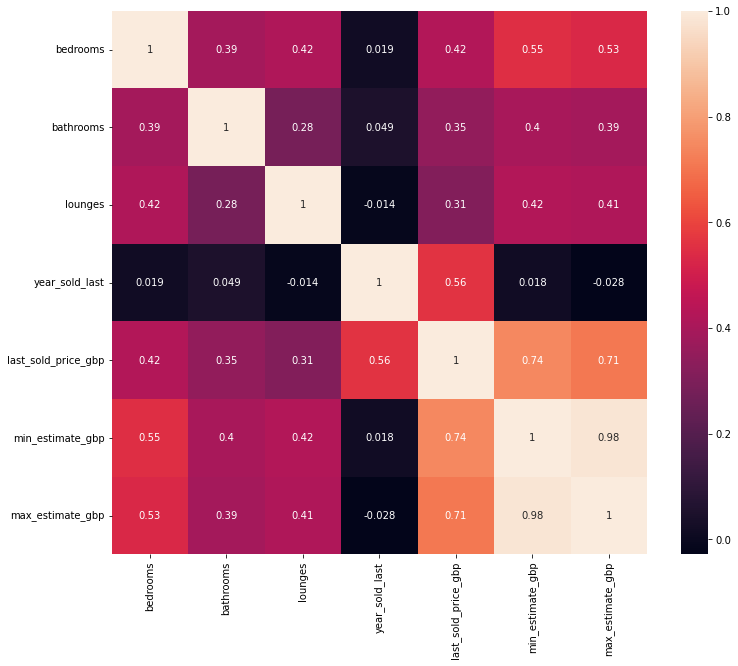

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(brom_croy.corr(), annot=True, ax=ax);

### Pairplot to graphically explore the full data

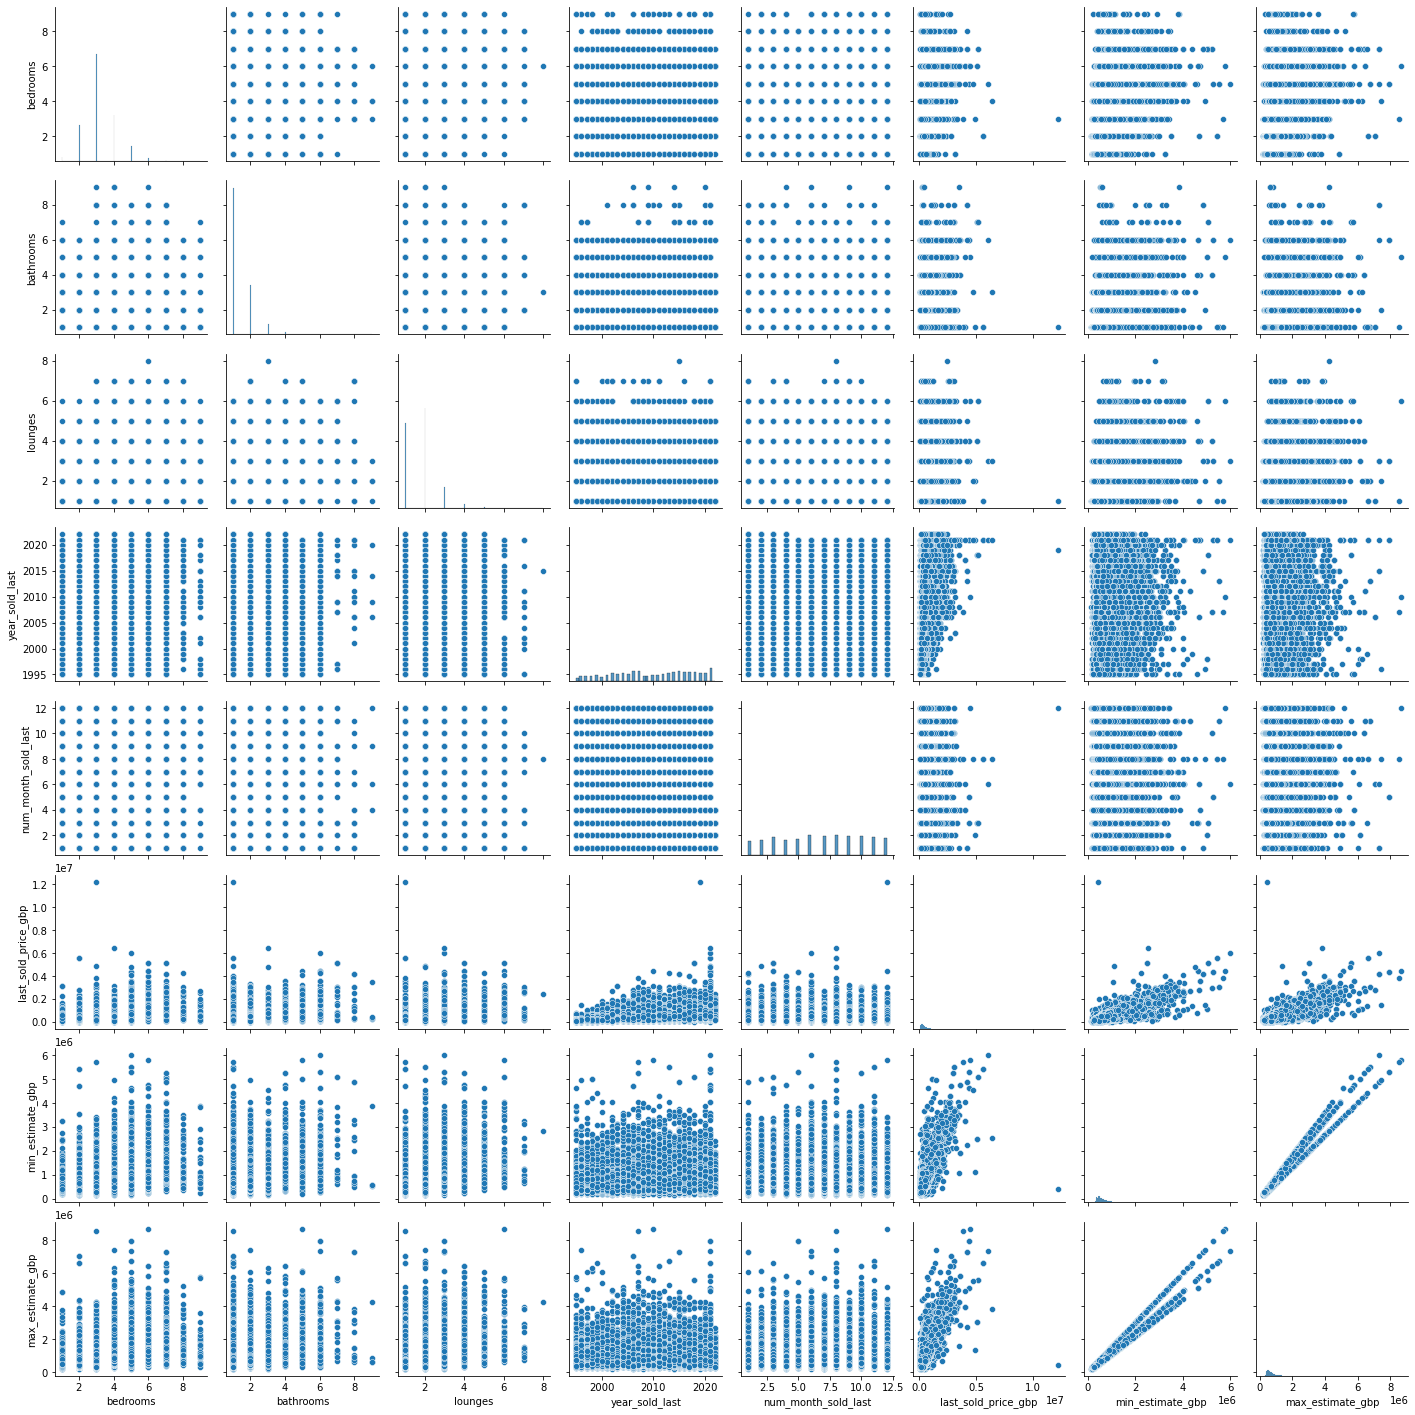

In [29]:

sns.pairplot(brom_croy)
#ax.tick_params(labeltop=True);

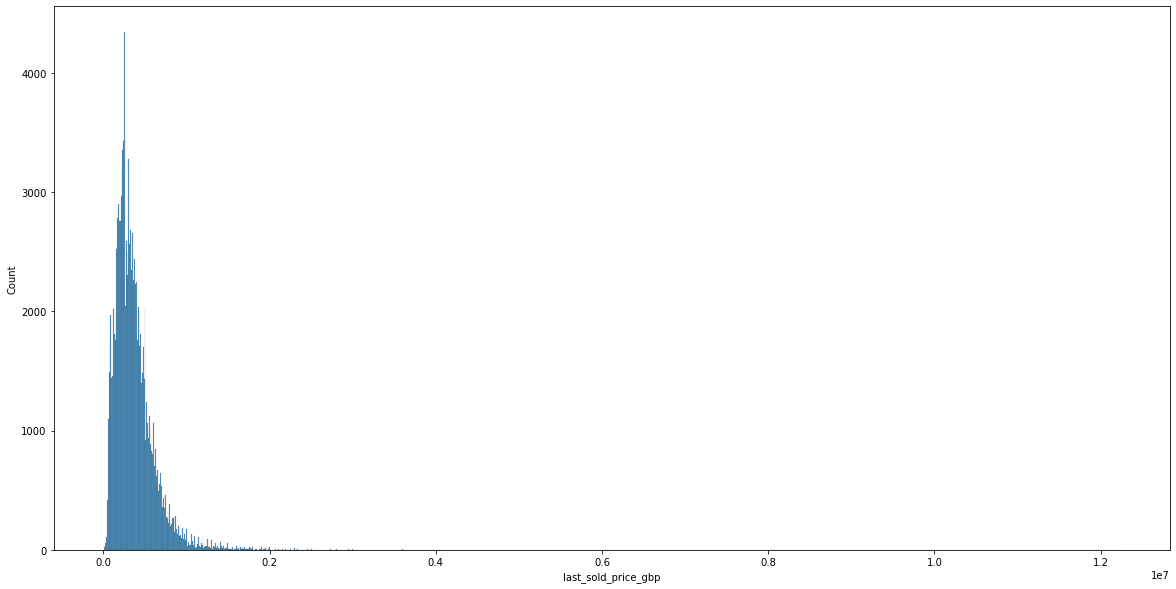

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(brom_croy.last_sold_price_gbp, ax=ax);

A few large outliers are draggin our histogram out to the right. It is easier to visulaise the data instead with a log plot

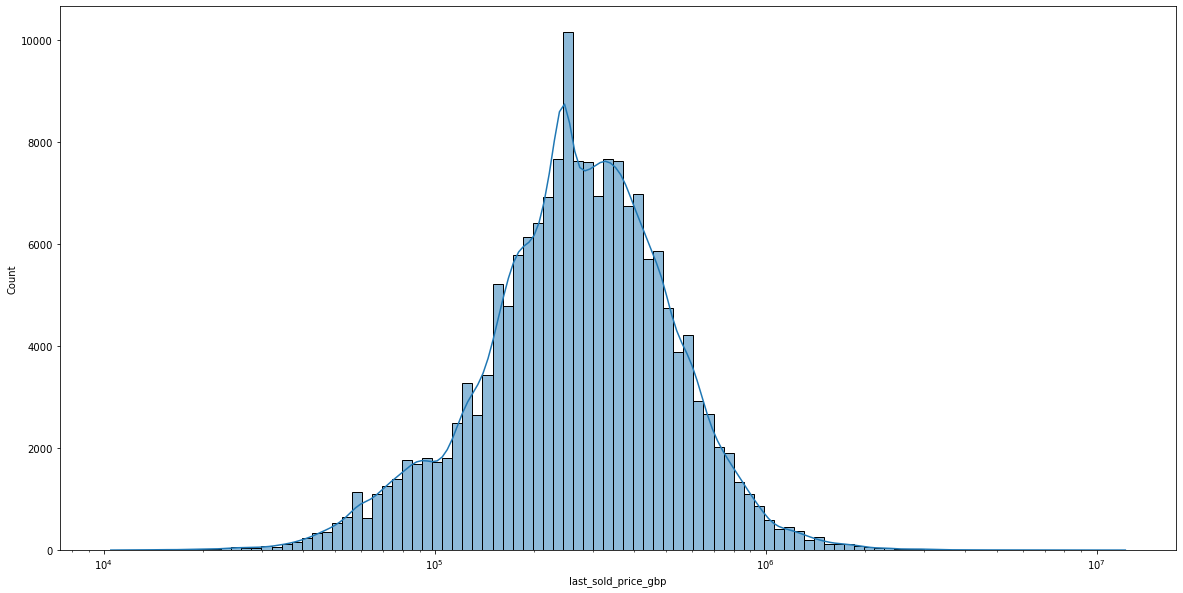

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(hist_df.last_sold_price_gbp, log_scale=10,kde=True, bins=101, ax=ax);

### Why the overrepresented value in the middle? t(-.-t)

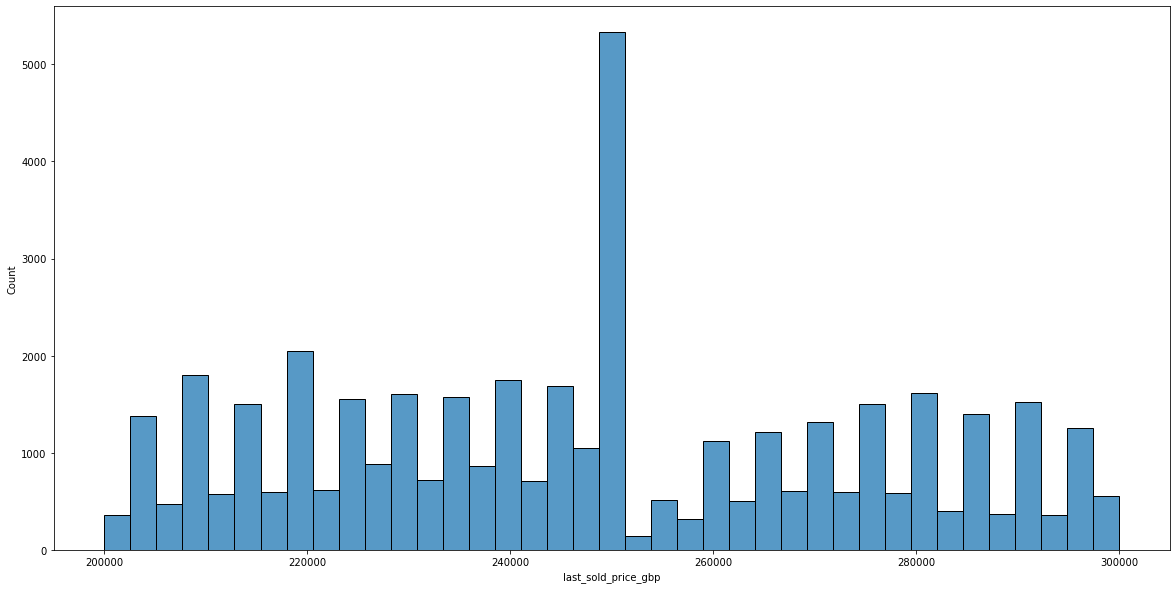

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(hist_df[(200000 < hist_df.last_sold_price_gbp) & (hist_df.last_sold_price_gbp < 300000)].last_sold_price_gbp, ax=ax);

There is a spike in property sales valued at exactly £250K. We will not be verifying Zoopla's historical price against Land Registry but are assuming this is the correct price.
It is possible that the spike is due to Right To Buy scheme which seems to be centred around the round figure £250K this could not be confirmed against avialable sources on the internet
https://www.croydon.gov.uk/sites/default/files/right-to-buy-information-for-tenants-april-2020.pdf

In [33]:
hist_df[(200000 < hist_df.last_sold_price_gbp) & (hist_df.last_sold_price_gbp < 300000)].last_sold_price_gbp.value_counts().iloc[:30]

250000.0    3704
220000.0    1329
275000.0    1286
210000.0    1272
225000.0    1257
245000.0    1247
240000.0    1236
235000.0    1216
230000.0    1201
280000.0    1152
290000.0    1138
270000.0    1069
285000.0    1068
215000.0    1047
265000.0    1020
295000.0     958
205000.0     910
260000.0     869
249950.0     646
255000.0     379
248000.0     358
249995.0     329
249000.0     296
247000.0     290
218000.0     281
228000.0     257
212000.0     247
242000.0     231
238000.0     231
227000.0     223
Name: last_sold_price_gbp, dtype: int64

In [34]:
hist_df[hist_df.last_sold_price_gbp == 250000].groupby(['year_sold_last','bedrooms']).count()['address'].sort_values(ascending=False).iloc[:50]

year_sold_last  bedrooms
2007            3.0         181
2014            2.0         178
2013            3.0         170
2010            3.0         150
2012            3.0         146
2006            3.0         141
2014            3.0         134
2011            3.0         134
2008            3.0         133
2009            3.0         116
2005            3.0         110
2015            2.0         104
2013            2.0         101
2004            3.0          97
2003            3.0          84
2007            2.0          84
2012            2.0          76
2010            2.0          72
2008            2.0          68
2011            2.0          66
2006            2.0          57
2002            3.0          54
2015            3.0          42
                1.0          38
2001            3.0          37
2005            2.0          35
2003            4.0          35
2016            1.0          35
2002            4.0          34
2006            4.0          34
2009           

In [35]:
hist_df[hist_df.last_sold_price_gbp == 250000].postcode_half1.value_counts()

CR0     678
BR2     560
BR1     403
CR4     317
BR3     292
CR2     248
BR6     236
CR7     218
BR5     170
CR8     150
CR5     139
BR7      97
DA14     92
BR4      60
DA15     44
Name: postcode_half1, dtype: int64

### Test code

In [36]:
 brom_croy_freehold_means = brom_croy.groupby(['date_sold_last']).mean()

In [37]:
brom_croy_freehold_means

,bedrooms,bathrooms,lounges,year_sold_last,last_sold_price_gbp,min_estimate_gbp,max_estimate_gbp
date_sold_last,,,,,,,
1995-01-01,3.164474,1.407895,1.684211,1995.0,107534.526316,655039.473684,787026.315789
1995-02-01,3.148387,1.348387,1.748387,1995.0,95546.825806,605232.258065,738761.290323
1995-03-01,3.148352,1.307692,1.659341,1995.0,101388.054945,620076.923077,756719.780220
1995-04-01,3.391892,1.364865,1.824324,1995.0,102605.628378,627445.945946,763155.405405
1995-05-01,3.168224,1.392523,1.728972,1995.0,114566.887850,673401.869159,819317.757009
...,...,...,...,...,...,...,...
2021-12-01,3.202614,1.356209,1.709150,2021.0,603631.369281,607326.797386,685888.888889
2022-01-01,3.251309,1.403141,1.795812,2022.0,609299.476440,605162.303665,676418.848168
2022-02-01,3.314554,1.492958,1.713615,2022.0,635881.967136,624215.962441,708779.342723


In [38]:
brom_croy_freehold_means.resample('Y').mean()

,bedrooms,bathrooms,lounges,year_sold_last,last_sold_price_gbp,min_estimate_gbp,max_estimate_gbp
date_sold_last,,,,,,,
1995-12-31,3.202696,1.372125,1.775421,1995.0,104828.574790,640314.368878,779110.486934
1996-12-31,3.192896,1.376874,1.799440,1996.0,107486.375134,634406.777469,765876.381023
1997-12-31,3.155555,1.341474,1.757843,1997.0,119805.055120,619045.244297,745759.105042
1998-12-31,3.195740,1.360157,1.748154,1998.0,136874.241310,615072.378135,738710.758647
1999-12-31,3.194100,1.358590,1.771420,1999.0,157858.078051,621737.912378,745680.004250
2000-12-31,3.141413,1.337496,1.762373,2000.0,186537.227189,612847.234738,730480.034212
2001-12-31,3.177126,1.355499,1.729275,2001.0,204663.864923,613274.946326,727661.317205
2002-12-31,3.150042,1.331618,1.734643,2002.0,228995.135848,598732.051085,708618.995599
2003-12-31,3.151941,1.332654,1.735521,2003.0,260819.775476,596046.065261,700672.077710


In [39]:
brom_croy_ts = brom_croy.set_index('date_sold_last')

In [40]:
brom_croy_ts[brom_croy_ts['bedrooms'] == 2].resample('Y').mean()

,bedrooms,bathrooms,lounges,year_sold_last,last_sold_price_gbp,min_estimate_gbp,max_estimate_gbp
date_sold_last,,,,,,,
1995-12-31,2.0,1.132979,1.359043,1995.0,85353.513298,526965.425532,643986.702128
1996-12-31,2.0,1.207024,1.384473,1996.0,83498.051756,505114.602588,610693.160813
1997-12-31,2.0,1.150000,1.343333,1997.0,92322.923333,486985.000000,588435.000000
1998-12-31,2.0,1.144869,1.400402,1998.0,104474.718310,478058.350101,577778.672032
1999-12-31,2.0,1.162162,1.353153,1999.0,127667.931532,512025.225225,622344.144144
2000-12-31,2.0,1.145038,1.423664,2000.0,145601.255725,488931.297710,583484.732824
2001-12-31,2.0,1.161240,1.359690,2001.0,149886.992248,461708.527132,544846.511628
2002-12-31,2.0,1.121394,1.366587,2002.0,171480.278846,458467.548077,542264.423077
2003-12-31,2.0,1.181354,1.372925,2003.0,199747.881226,455998.722861,532920.817369


## Bromley&Croydon - Price Change since 1995

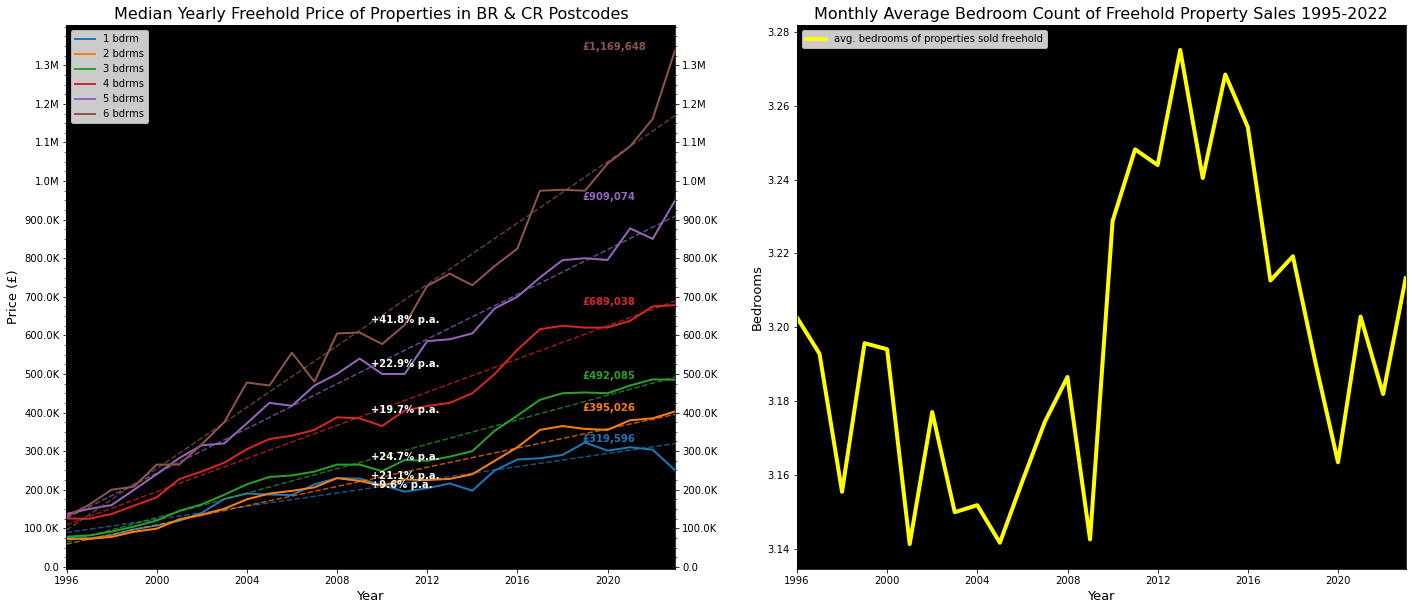

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(24,10))

#Looping through number of bedrooms
for num_bedrooms in sorted(brom_croy['bedrooms'].unique())[:6]:
    #line plots of time series data
    y = brom_croy_ts[brom_croy_ts['bedrooms'] == num_bedrooms].resample('Y').median()['last_sold_price_gbp']
    line = axs[0].plot(y, label=f"{num_bedrooms:.0f} {'bdrm' if num_bedrooms ==1 else 'bdrms'}", lw=2)
    
    #regression dashed line plots
    x = mdates.date2num(y.index)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    lin_reg = p(x)
    axs[0].plot(x, p(x), "--", c=f'{line[-1].get_color()}',alpha=0.7)
    
    #Calculating text positions (centre = percentage change , right = 2022 price)
    total_percent_increase = (max(p(x)) - min(p(x)))/min(p(x))  * 100
    yearly_percent_increase = (max(p(x)) - min(p(x)))/min(p(x)) / ((max(y.index)-min(y.index)).days/365.25)* 100

    axs[0].text(x.mean(), lin_reg.mean(),f"+{yearly_percent_increase:.1f}% p.a.", c='white', weight='bold')
    axs[0].text(y.index.max() - pd.Timedelta("1500d"), y.max(), f"£{max(p(x)):,.0f}", c=line[-1].get_color(), weight='bold')

#Labelling Axes, Title, Legend
axes_font = 13
title_font= 16
axs[0].set_xlabel('Year', fontsize=axes_font)
axs[0].set_ylabel('Price (£)', fontsize=axes_font)
axs[0].tick_params(right=True, labelright=True, which='both')

axs[0].legend(loc='upper left')
axs[0].set_title('Median Yearly Freehold Price of Properties in BR & CR Postcodes', fontsize=title_font)


#Removing margin between axis and beginning of plot
axs[0].margins(x=0)
axs[1].margins(x=0)


#AXES
#Changing the y axis to end 1000s in K and 1,000,000 to M
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.1fK' % (x * 1e-3) if x >= 1e3 else '%1.1f' % x
mkformatter = FuncFormatter(mkfunc)
axs[0].yaxis.set_major_formatter(mkformatter)

#Adding y ticks
start, end = axs[0].get_ylim()
axs[0].set_yticks(np.arange(0, round(end, -5), 100000))
axs[0].yaxis.set_minor_locator(MultipleLocator(25000))

#Background Colour
axs[0].set_facecolor('black')


#SECOND PLOT

#line plot
axs[1].plot( brom_croy_freehold_means.resample('Y').mean()['bedrooms'], label='avg. bedrooms of properties sold freehold', lw=4 , color='yellow')

axs[1].set_title('Monthly Average Bedroom Count of Freehold Property Sales 1995-2022', fontsize=title_font)
axs[1].set_xlabel('Year', fontsize=axes_font)
axs[1].set_ylabel('Bedrooms', fontsize=axes_font)



axs[1].legend(loc='upper left')

#Background Colour
axs[1].set_facecolor('black');
#plt.subplots_adjust(wspace=0.2)

Plot 1 - The Sale price for freehold properties in Bromley Croydon has increased between 1995 - 2022 (27 years) by roughly:

    - 1 bedroom : 9.6% yearly or 259.2% in total
    - 2 bedrooms: 21.1% yearly or 568.3% in total
    - 3 bedrooms: 24.7% yearly or 666.9% in total 
    - 4 bedrooms: 19.7% yearly or 531.9% in total
    - 5 bedrooms: 22.9% yearly or 618.3% in total
    - 6 bedrooms: 41.8% yearly or 1128.6% in total

#### CANDLESTICK PLOT IN PROGRESS

In [42]:
"""

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()"""

"\n\n#create figure\nplt.figure()\n\n#define width of candlestick elements\nwidth = .4\nwidth2 = .05\n\n#define up and down prices\nup = prices[prices.close>=prices.open]\ndown = prices[prices.close<prices.open]\n\n#define colors to use\ncol1 = 'green'\ncol2 = 'red'\n\n#plot up prices\nplt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)\nplt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)\nplt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)\n\n#plot down prices\nplt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)\nplt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)\nplt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)\n\n#rotate x-axis tick labels\nplt.xticks(rotation=45, ha='right')\n\n#display candlestick chart\nplt.show()"

# FREEHOLD BROMLEY & CROYDON DATA since 2021 DATASET

**This is the dataset that will be used for our modelling stage**

In [43]:
df_2021 = brom_croy[(brom_croy.year_sold_last >= 2021)]

In [44]:
df_2021.head()

,address,paon,saon,postcode,postcode_half1,postcode_half2,bedrooms,bathrooms,lounges,url,tenure,property_type,date_sold_last,year_sold_last,num_month_sold_last,last_sold_price_gbp,min_estimate_gbp,max_estimate_gbp
40,"1 Waldegrave Road, Bromley, BR1 2JP",1 Waldegrave Road,Bromley,BR1 2JP,BR1,2JP,5.0,3.0,3,/property/uprn/100020418342/,freehold,detached house,2021-01-01,2021,1,1600000.0,1633000.0,1804000.0
43,"1 Fairmead, Bromley, BR1 2JT",1 Fairmead,Bromley,BR1 2JT,BR1,2JT,4.0,4.0,1,/property/uprn/100020397279/,freehold,end terrace house,2022-02-01,2022,2,795000.0,682000.0,754000.0
60,"1 Cedar Copse, Bromley, BR1 2NY",1 Cedar Copse,Bromley,BR1 2NY,BR1,2NY,5.0,1.0,2,/property/uprn/100020393669/,freehold,detached property,2021-12-01,2021,12,1150000.0,1151000.0,1273000.0
115,"1 Northfield Close, Bromley, BR1 2WZ",1 Northfield Close,Bromley,BR1 2WZ,BR1,2WZ,5.0,3.0,4,/property/uprn/100020424756/,freehold,detached house,2021-03-01,2021,3,1325000.0,1423000.0,1573000.0
129,"1 The Chase, Bromley, BR1 3DE",1 The Chase,Bromley,BR1 3DE,BR1,3DE,3.0,1.0,2,/property/uprn/100020416836/,freehold,semi-detached house,2021-11-01,2021,11,703000.0,747000.0,826000.0


## Histogram of 2021 Data


In [ ]:
df_2021

In [88]:
df_cutoff = df_2021[df_2021.bedrooms <= 5] #[df_2021.last_sold_price_gbp < (1.5 * 10 ** 6)]

In [89]:
df_cutoff

,address,paon,saon,postcode,postcode_half1,postcode_half2,bedrooms,bathrooms,lounges,url,tenure,property_type,date_sold_last,year_sold_last,num_month_sold_last,last_sold_price_gbp,min_estimate_gbp,max_estimate_gbp
40,"1 Waldegrave Road, Bromley, BR1 2JP",1 Waldegrave Road,Bromley,BR1 2JP,BR1,2JP,5.0,3.0,3,/property/uprn/100020418342/,freehold,detached house,2021-01-01,2021,1,1600000.0,1633000.0,1804000.0
43,"1 Fairmead, Bromley, BR1 2JT",1 Fairmead,Bromley,BR1 2JT,BR1,2JT,4.0,4.0,1,/property/uprn/100020397279/,freehold,end terrace house,2022-02-01,2022,2,795000.0,682000.0,754000.0
60,"1 Cedar Copse, Bromley, BR1 2NY",1 Cedar Copse,Bromley,BR1 2NY,BR1,2NY,5.0,1.0,2,/property/uprn/100020393669/,freehold,detached property,2021-12-01,2021,12,1150000.0,1151000.0,1273000.0
115,"1 Northfield Close, Bromley, BR1 2WZ",1 Northfield Close,Bromley,BR1 2WZ,BR1,2WZ,5.0,3.0,4,/property/uprn/100020424756/,freehold,detached house,2021-03-01,2021,3,1325000.0,1423000.0,1573000.0
129,"1 The Chase, Bromley, BR1 3DE",1 The Chase,Bromley,BR1 3DE,BR1,3DE,3.0,1.0,2,/property/uprn/100020416836/,freehold,semi-detached house,2021-11-01,2021,11,703000.0,747000.0,826000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294210,"4 Bredune, Kenley, CR8 5DU",4 Bredune,Kenley,CR8 5DU,CR8,5DU,4.0,2.0,2,/property/uprn/200001186077/,freehold,detached house,2021-12-01,2021,12,756000.0,693000.0,766000.0
294270,"Fairlane, Bywood Close, Kenley, CR8 5LS",Fairlane,"Bywood Close, Kenley",CR8 5LS,CR8,5LS,4.0,2.0,3,/property/uprn/200001185189/,freehold,detached house,2021-02-01,2021,2,855000.0,908000.0,1003000.0
294965,"Woden Law, Firs Road, Kenley, CR8 5LG",Woden Law,"Firs Road, Kenley",CR8 5LG,CR8,5LG,4.0,4.0,4,/property/uprn/100020634909/,freehold,detached house,2021-11-01,2021,11,1500000.0,1477000.0,1633000.0
294971,"Wurlie, Warren Road, Purley, CR8 1AA",Wurlie,"Warren Road, Purley",CR8 1AA,CR8,1AA,3.0,2.0,1,/property/uprn/100020670157/,freehold,detached house,2021-04-01,2021,4,515000.0,539000.0,658000.0


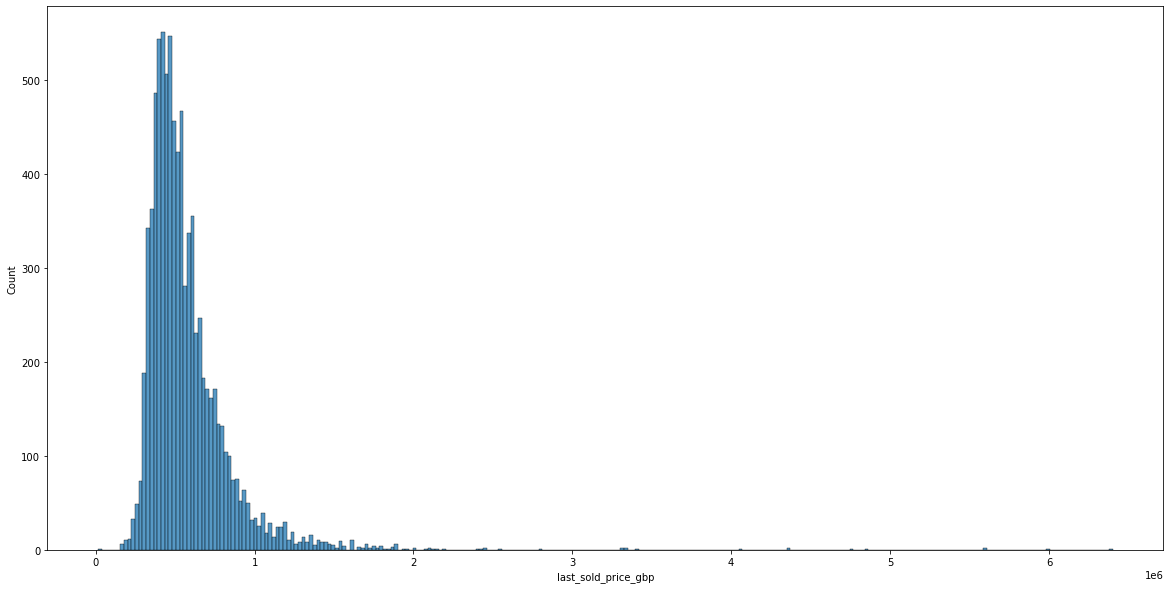

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_cutoff.last_sold_price_gbp, ax=ax);

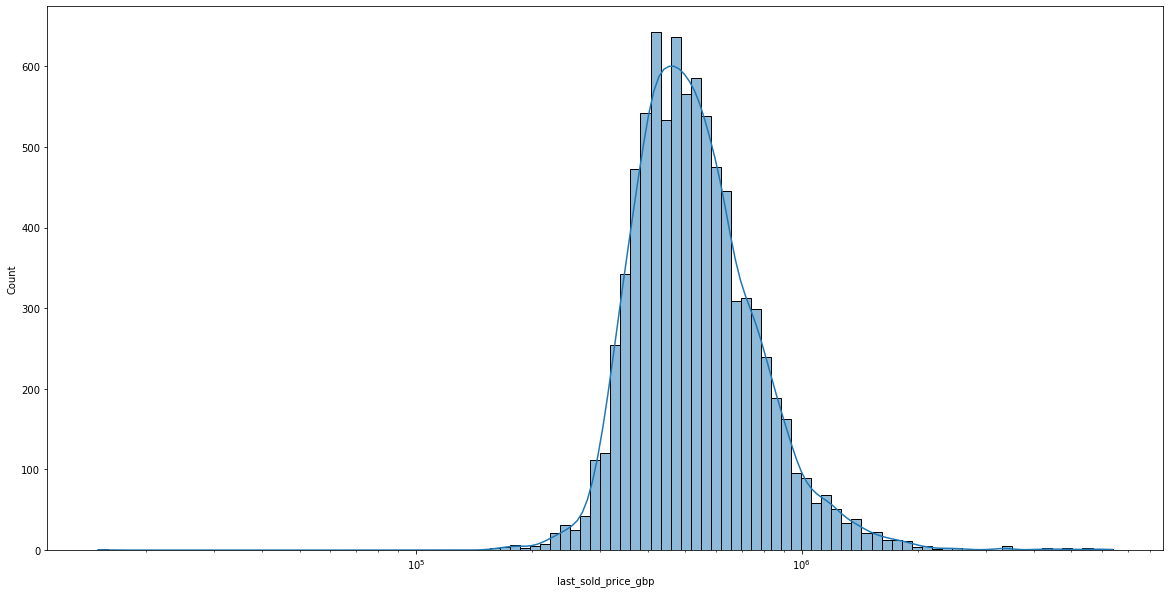

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_cutoff.last_sold_price_gbp, log_scale=10,kde=True, bins=101, ax=ax);

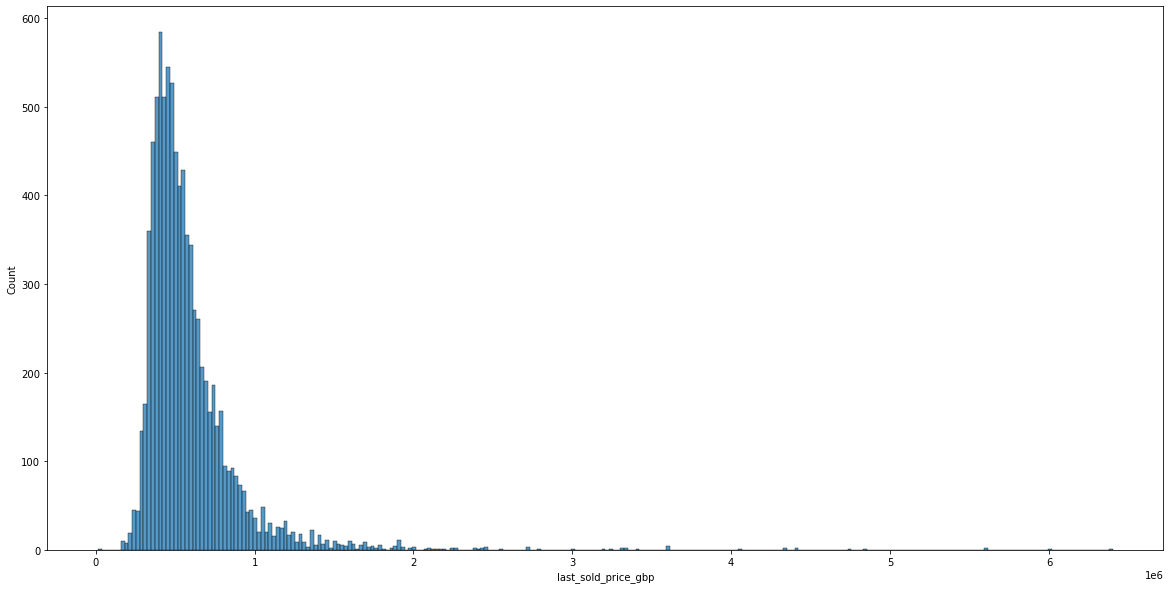

In [76]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_2021.last_sold_price_gbp, ax=ax);

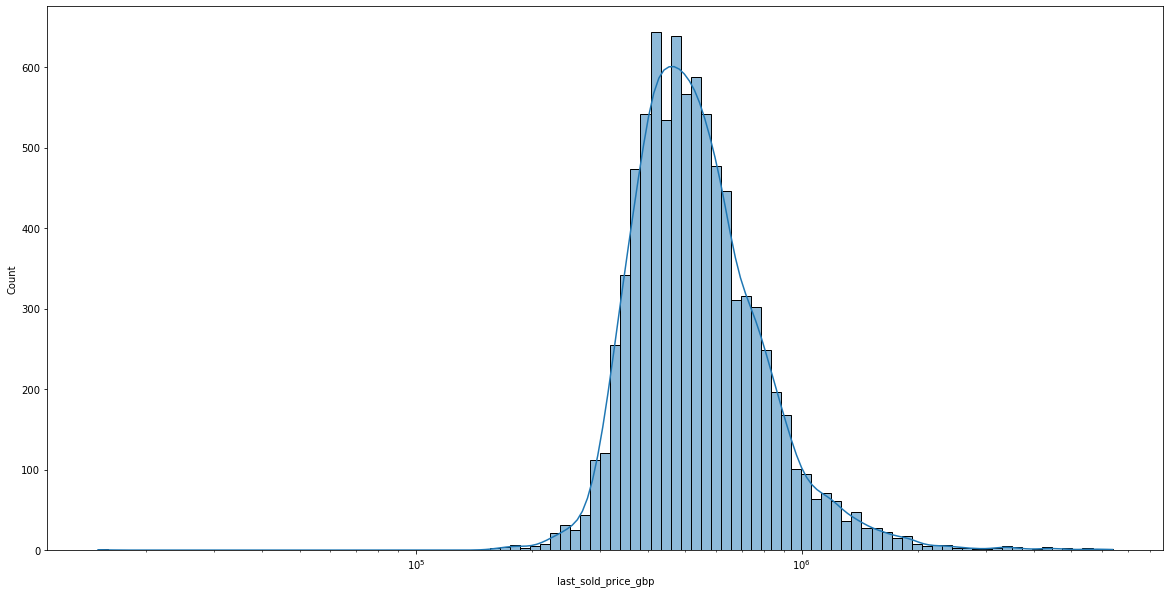

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_2021.last_sold_price_gbp, log_scale=10,kde=True, bins=101, ax=ax);

## Outlier Analysis

### Boxplots

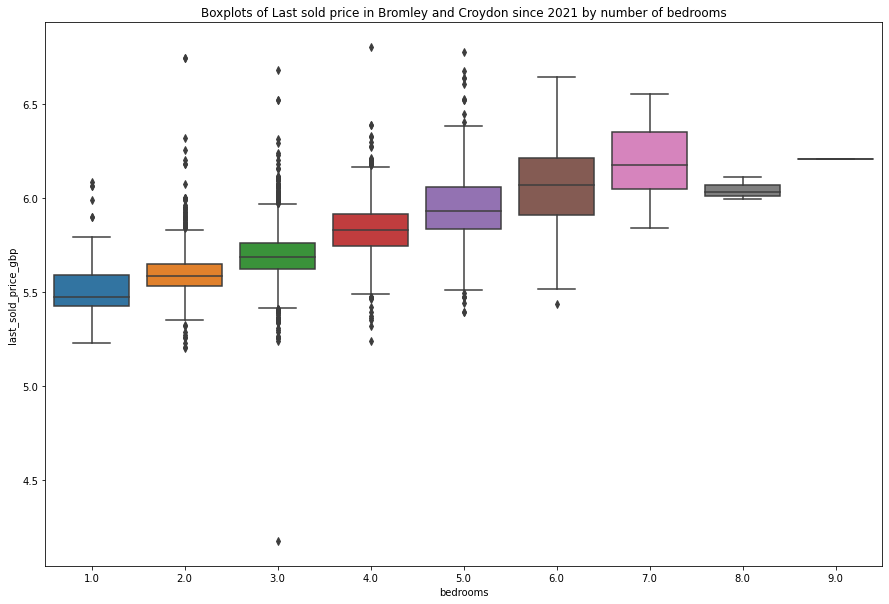

In [45]:
x = df_2021.bedrooms
y = np.log10(df_2021.last_sold_price_gbp)


fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=x,y=y, ax=ax)

ax.set_title("Boxplots of Last sold price in Bromley and Croydon since 2021 by number of bedrooms");

### Violinplots

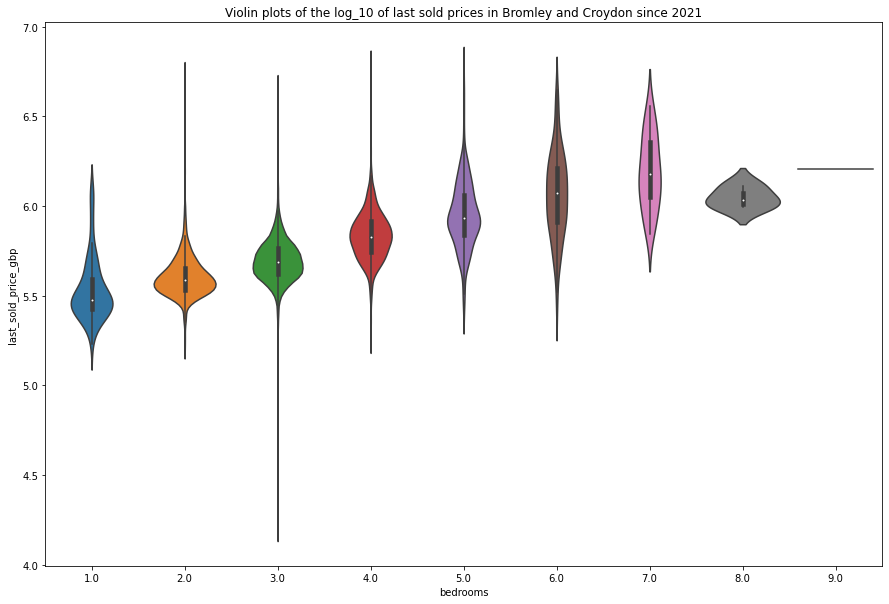

In [46]:
x = df_2021.bedrooms
y = np.log10(df_2021.last_sold_price_gbp)


fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Violin plots of the log_10 of last sold prices in Bromley and Croydon since 2021')


sns.violinplot(x=x,y=y, ax=ax);

In [47]:
x.value_counts().sort_index(ascending=True)

1.0      83
2.0    1559
3.0    4383
4.0    1892
5.0     551
6.0     104
7.0      30
8.0       3
9.0       2
Name: bedrooms, dtype: int64

As properties are heavily right skewed which shifts the mean to the right we will remove outliers using the median, specifically +- 1.5 x the interquartile values

### Using Inter Quartile Range (IQR) to drop outliers for each number of bedrooms

In [48]:
df = df_2021.copy() #copy to remove outliers

In [49]:
def outlier_dropper(df):
    for x in sorted(df.bedrooms.unique()):
        upper_quartile = df[df.bedrooms == x]['last_sold_price_gbp'].quantile(0.75)
        lower_quartile = df[df.bedrooms == x]['last_sold_price_gbp'].quantile(0.25)
        iqr = upper_quartile - lower_quartile
        print('lower quantile', lower_quartile)
        print('upper quantile', upper_quartile)
        
        print(iqr)
        upper_bound = upper_quartile + (iqr * 1.5)
        print('upper', upper_bound)
        lower_bound = lower_quartile - (iqr * 1.5)
        print('lower', lower_bound)
        lower_indexes_to_drop = df[(df.bedrooms == x) & (df.last_sold_price_gbp < lower_bound)].index
        upper_indexes_to_drop = df[(df.bedrooms == x) & (df.last_sold_price_gbp > upper_bound)].index 
        print('len lower', len(lower_indexes_to_drop))
        print(lower_indexes_to_drop[:5])
        print('len upper', len(upper_indexes_to_drop))
        print(upper_indexes_to_drop[:5])
        print()
        df.drop(index=lower_indexes_to_drop, inplace=True)
        df.drop(index=upper_indexes_to_drop, inplace=True)
        #print(len(indexes_to_drop))

In [50]:
def outlier_dropper_full_data(df):
        upper_quartile = df['last_sold_price_gbp'].quantile(0.75)
        lower_quartile = df['last_sold_price_gbp'].quantile(0.25)
        iqr = upper_quartile - lower_quartile
        print('lower quantile', lower_quartile)
        print('upper quantile', upper_quartile)
        
        print(iqr)
        upper_bound = upper_quartile + (iqr * 1.5)
        print('upper', upper_bound)
        lower_bound = lower_quartile - (iqr * 1.5)
        print('lower', lower_bound)
        lower_indexes_to_drop = df[df.last_sold_price_gbp < lower_bound].index
        upper_indexes_to_drop = df[df.last_sold_price_gbp > upper_bound].index 
        print('len lower', len(lower_indexes_to_drop))
        print(lower_indexes_to_drop[:5])
        print('len upper', len(upper_indexes_to_drop))
        print(upper_indexes_to_drop[:5])
        print()
        df.drop(index=lower_indexes_to_drop, inplace=True)
        df.drop(index=upper_indexes_to_drop, inplace=True)
        #print(len(indexes_to_drop))

In [51]:
#outlier_dropper(df)
outlier_dropper_full_data(df)

lower quantile 415000.0
upper quantile 660000.0
245000.0
upper 1027500.0
lower 47500.0
len lower 1
Int64Index([156563], dtype='int64')
len upper 495
Int64Index([40, 60, 115, 651, 680], dtype='int64')



In [95]:
outlier_dropper_full_data(df_cutoff)

lower quantile 405000.0
upper quantile 615000.0
210000.0
upper 930000.0
lower 90000.0
len lower 0
Int64Index([], dtype='int64')
len upper 26
Int64Index([8278, 10647, 25531, 35759, 36471], dtype='int64')



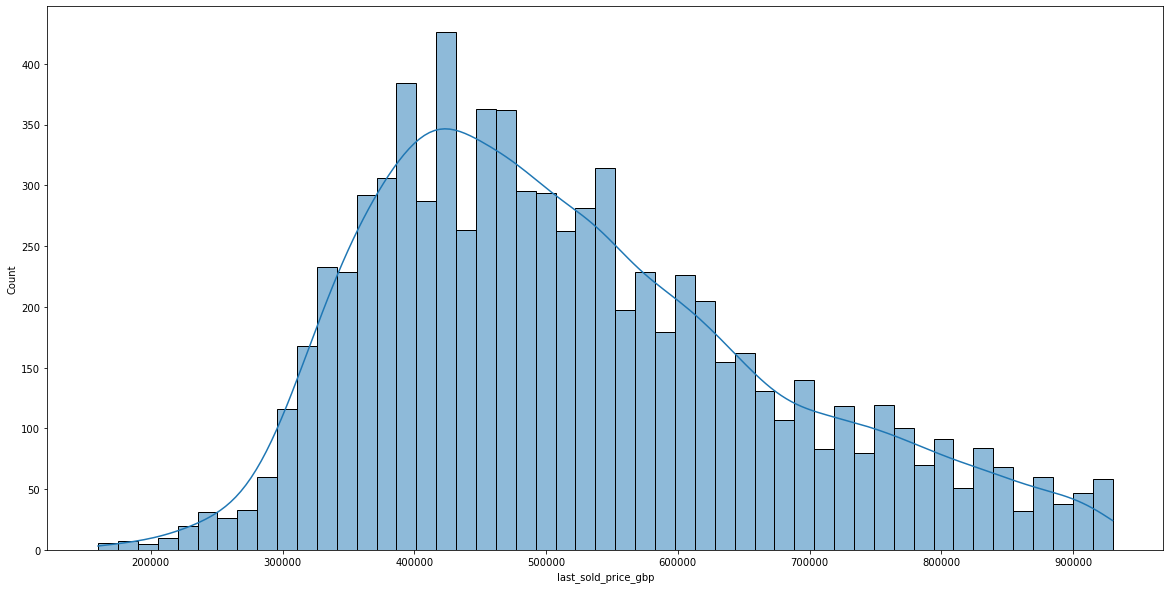

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_cutoff.last_sold_price_gbp,kde=True, bins=51, ax=ax);

In [102]:
path = "./data/bromley_croydon_clean/brom_croy_2021_2022_freehold_5_bed_cutoff.csv"
df_cutoff.to_csv(path)

### Boxplot After Dropping Outliers

/Users/oscarmumford/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


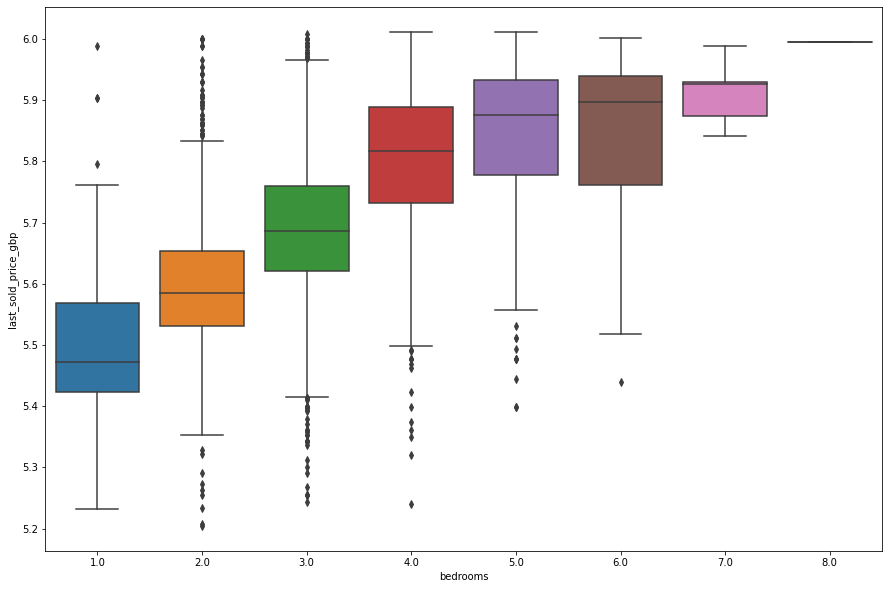

In [52]:
x = df.bedrooms
y = np.log10(df.last_sold_price_gbp)


fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x,y, ax=ax);

### Violinplot after dropping outliers

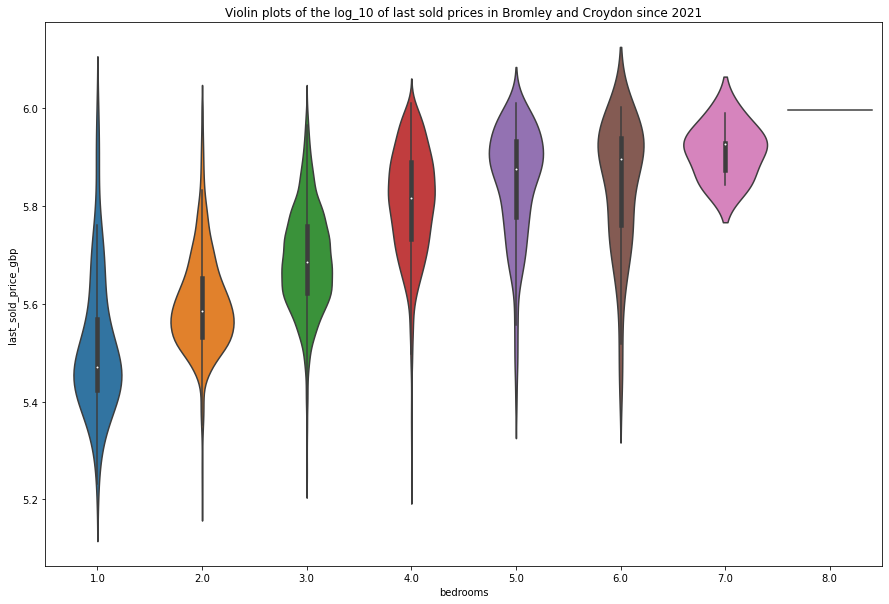

In [53]:
x = df.bedrooms
y = np.log10(df.last_sold_price_gbp)


fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Violin plots of the log_10 of last sold prices in Bromley and Croydon since 2021')


sns.violinplot(x=x,y=y, ax=ax);

## Histogram of log10(last sold price) since Jan 2021 to June 2022

''

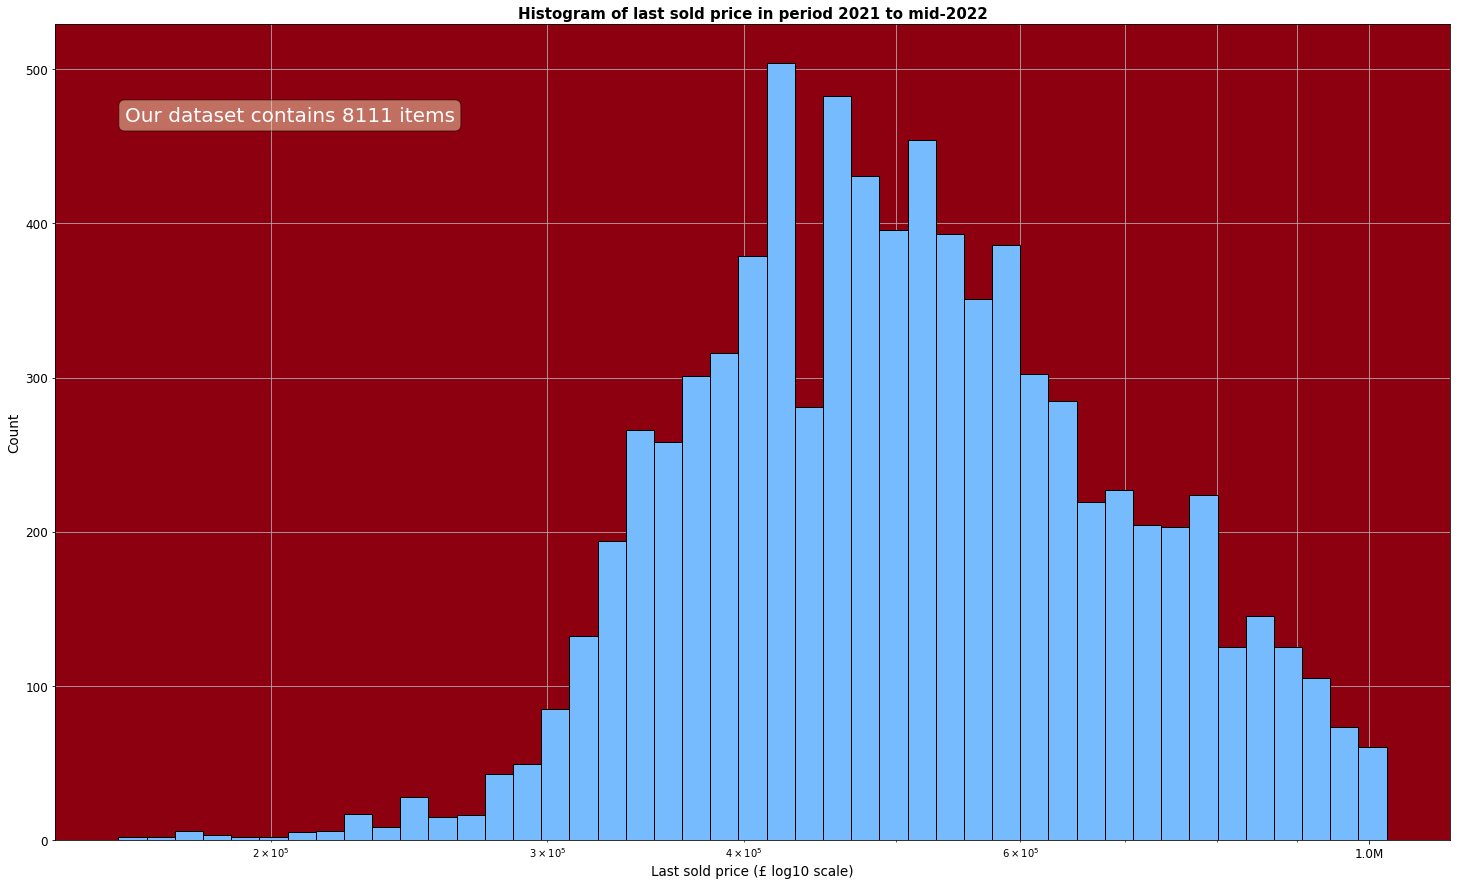

In [54]:
fig, ax = plt.subplots(figsize=(25,15))
sns.histplot(df['last_sold_price_gbp'], log_scale=10, ax=ax, color='xkcd:sky blue', alpha=1, zorder=3)

#AXES
axis_fontsize=13.5
ax.set_xlabel('Last sold price (£ log10 scale)', fontsize=axis_fontsize)
ax.set_ylabel('Count', fontsize=axis_fontsize)
ax.set_title('Histogram of last sold price in period 2021 to mid-2022', fontsize=15, weight='bold')
tick_fontsize=12
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

#Changing the y axis to end 1000s in K and 1,000,000 to M
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.1fK' % (x * 1e-3) if x >= 1e3 else '%1.1f' % x
mkformatter = FuncFormatter(mkfunc)
ax.xaxis.set_major_formatter(mkformatter)
ax.set_facecolor('xkcd:crimson')
ax.grid(which='both', zorder=0)


#TEXT BOX
box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.9, f"Our dataset contains {len(df)} items" , bbox=box_style, horizontalalignment='left', verticalalignment='top', transform = ax.transAxes, fontsize=20, color='white')
;

''

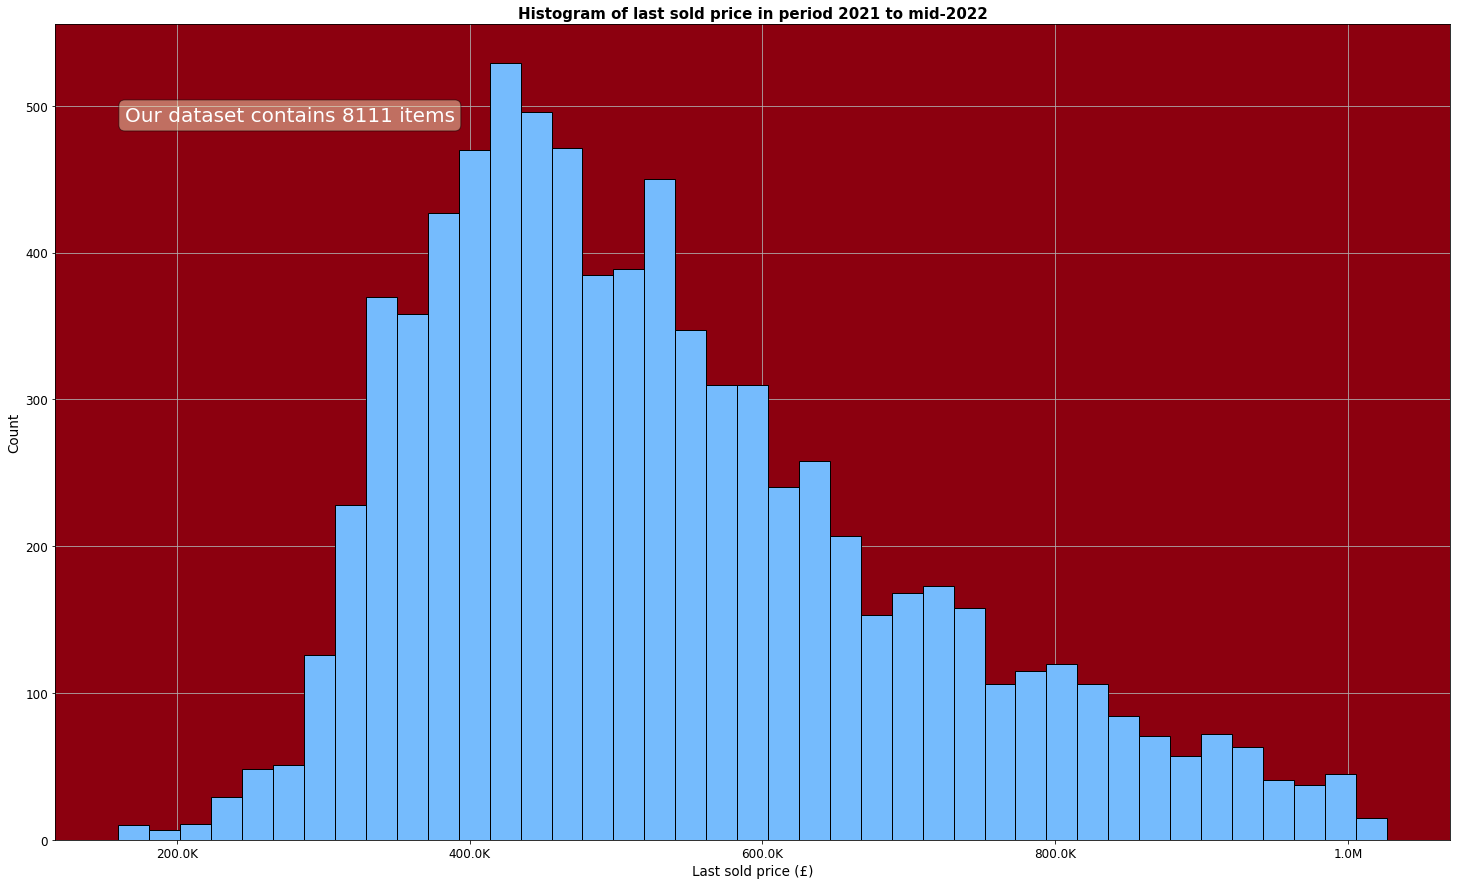

In [55]:
fig, ax = plt.subplots(figsize=(25,15))
sns.histplot(df['last_sold_price_gbp'], ax=ax, color='xkcd:sky blue', alpha=1, zorder=3)

#AXES
axis_fontsize=13.5
ax.set_xlabel('Last sold price (£)', fontsize=axis_fontsize)
ax.set_ylabel('Count', fontsize=axis_fontsize)
ax.set_title('Histogram of last sold price in period 2021 to mid-2022', fontsize=15, weight='bold')
tick_fontsize=12
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

#Changing the y axis to end 1000s in K and 1,000,000 to M
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.1fK' % (x * 1e-3) if x >= 1e3 else '%1.1f' % x
mkformatter = FuncFormatter(mkfunc)
ax.xaxis.set_major_formatter(mkformatter)
ax.set_facecolor('xkcd:crimson')
ax.grid(which='both', zorder=0)


#TEXT BOX
box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.9, f"Our dataset contains {len(df)} items" , bbox=box_style, horizontalalignment='left', verticalalignment='top', transform = ax.transAxes, fontsize=20, color='white')
;

## Analysis by Number of Bedrooms

In [56]:
df.bedrooms.describe()

count    8111.000000
mean        3.111577
std         0.821567
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: bedrooms, dtype: float64

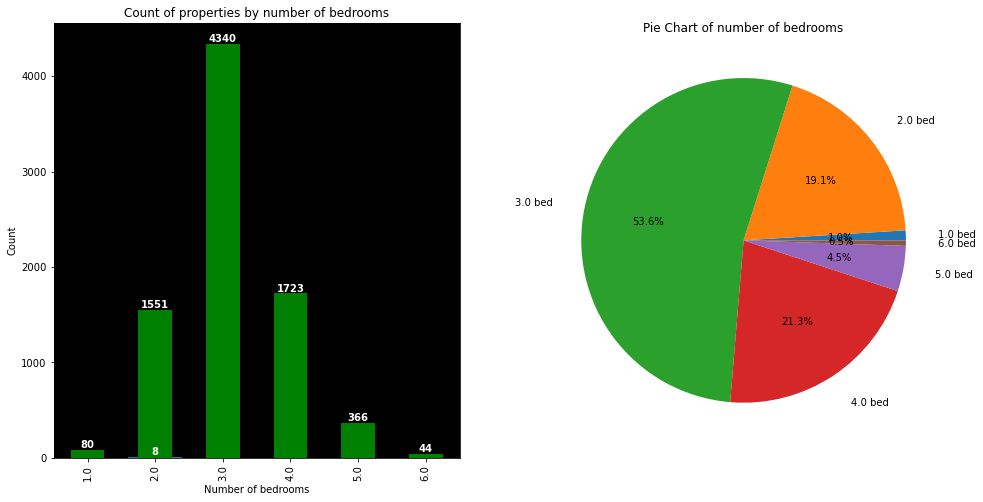

In [61]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

#BAR CHART 
bedroom_counts = df['bedrooms'].value_counts().sort_index()[:6]


x_plt = df['bedrooms'].value_counts().sort_index()
y_plt = df['bedrooms'].value_counts().sort_index().index
bars = axs[0].bar(x=x_plt, height=y_plt)
bedroom_counts.plot(ax=axs[0], kind='bar', color='green')

axs[0].set_title('Count of properties by number of bedrooms')
axs[0].set_xlabel('Number of bedrooms')
axs[0].set_ylabel('Count')
axs[0].set_facecolor('black')
for bars in axs[0].containers:
    axs[0].bar_label(bars, color='white', weight='bold')

#PIE CHART
n_beds = 7
axs[1].pie(x=bedroom_counts[:n_beds], labels=[f"{each} bed" for each in bedroom_counts.index[:n_beds]],labeldistance=1.2, autopct='%1.1f%%')
axs[1].set_title('Pie Chart of number of bedrooms');
#ax.pie()
#show exact percentages above the charts


## Mean/Median Sale Price vs Number of Bedrooms

In [62]:
mean_last_sold_by_bedrooms = df[['bedrooms','last_sold_price_gbp']].groupby('bedrooms').mean().rename(columns={'last_sold_price_gbp':'mean'})
median_last_sold_by_bedrooms = df[['bedrooms','last_sold_price_gbp']].groupby('bedrooms').median().rename(columns={'last_sold_price_gbp':'median'})
count_last_sold_by_bedrooms = df[['bedrooms','last_sold_price_gbp']].groupby('bedrooms').count().rename(columns={'last_sold_price_gbp':'count'})
pd.concat([mean_last_sold_by_bedrooms.round(2), median_last_sold_by_bedrooms, count_last_sold_by_bedrooms], axis=1 )

,mean,median,count
bedrooms,,,
1.0,345187.50,296250.0,80
2.0,411449.77,385000.0,1551
3.0,505748.23,485000.0,4340
4.0,662556.49,655000.0,1723
5.0,726137.33,750000.0,366
6.0,725710.23,787500.0,44
7.0,820916.67,842750.0,6
8.0,990000.00,990000.0,1


''

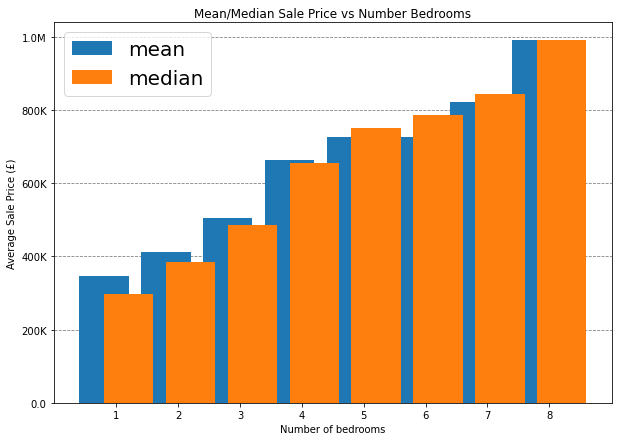

In [63]:
x = mean_last_sold_by_bedrooms.index

y1 = mean_last_sold_by_bedrooms.iloc[:,0]
y2 = median_last_sold_by_bedrooms.iloc[:,0]

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x-0.2, y1, label='mean')
ax.bar(x+0.2, y2, label='median')
ax.bar
ax.set_title('Mean/Median Sale Price vs Number Bedrooms')


ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Average Sale Price (£)')


ax.set_xticks(mean_last_sold_by_bedrooms.index)
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.1f' % x
mkformatter = FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend(loc='upper left', prop={'size': 20})
;

## Histograms of Last Sold Price vs Number of Bedrooms (All 9)

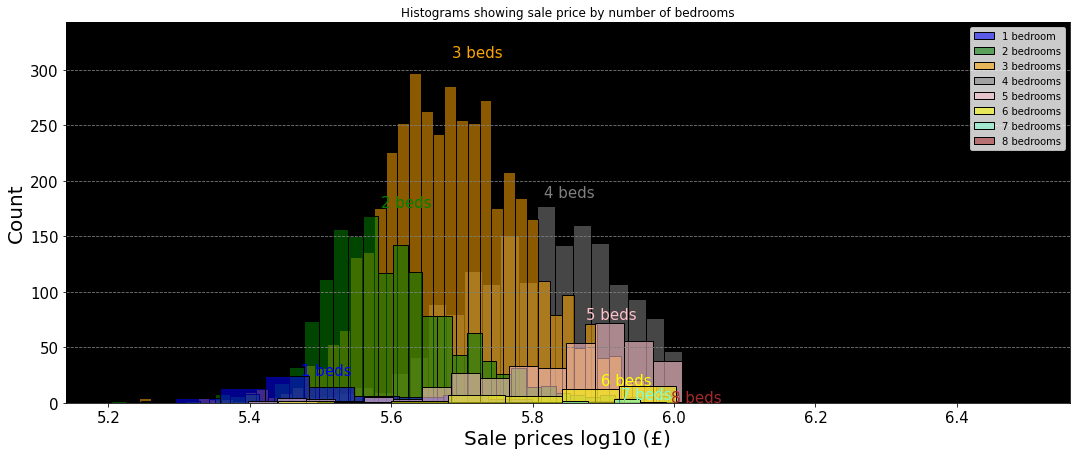

In [64]:
x = df.bedrooms
y = np.log10(df.last_sold_price_gbp[df.last_sold_price_gbp > 10**5])


fig, ax = plt.subplots(figsize=(18,7))

#PLOTTING 

colours = ['red','blue','green','orange','gray','pink','yellow','aquamarine','brown','violet']

for num_bedrooms in x.unique():
    plot_colour = colours[int(num_bedrooms)]
    sns.histplot(y[df['bedrooms'] == num_bedrooms],
                color=plot_colour,
                alpha=0.55,
                label=f"{num_bedrooms:.0f} {'bedroom' if num_bedrooms == 1 else 'bedrooms'}",
                ax=ax)
    

    
    
    p = ax.patches #gets the bars in the histogram
    all_heights = [patch.get_height() for patch in p]
    new_heights = all_heights.copy()
        
    try:
        for element in all_previous_heights:
            if element in new_heights:
                new_heights.remove(element)
    except: 
        pass

    all_previous_heights = all_heights.copy()
    
    try:
        highest_point = max(new_heights)


        text_height = highest_point

        height_scaler = 1.05 
        ax.text(x=y[df['bedrooms'] == num_bedrooms].median(),
                y=text_height * height_scaler,
                s=f"{num_bedrooms:.0f} beds",
                c=plot_colour,
                fontsize=15.0)
    except:
        pass
    


#TITLES
    
ax.set_title('Histograms showing sale price by number of bedrooms')

#ADJUSTING AXES
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(top=top*1.1)   # set the ylim to bottom, top
#ylim(bottom, top)  


#AXIS LABELS 
label_fontsize = 20
ax.set_xlabel('Sale prices log10 (£)', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)

#TICK SIZES
tick_fontsize= 15
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)


#LEGEND

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)


# ax.set_xticks(last_sold_by_bedrooms.index)

#GRID 

# ax.grid(axis='y')
# ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')


#BACKGROUND COLOUR

ax.set_facecolor('black')


plt.show()

## Histograms of Last Sold Price vs Number of Bedrooms (Up to 6)

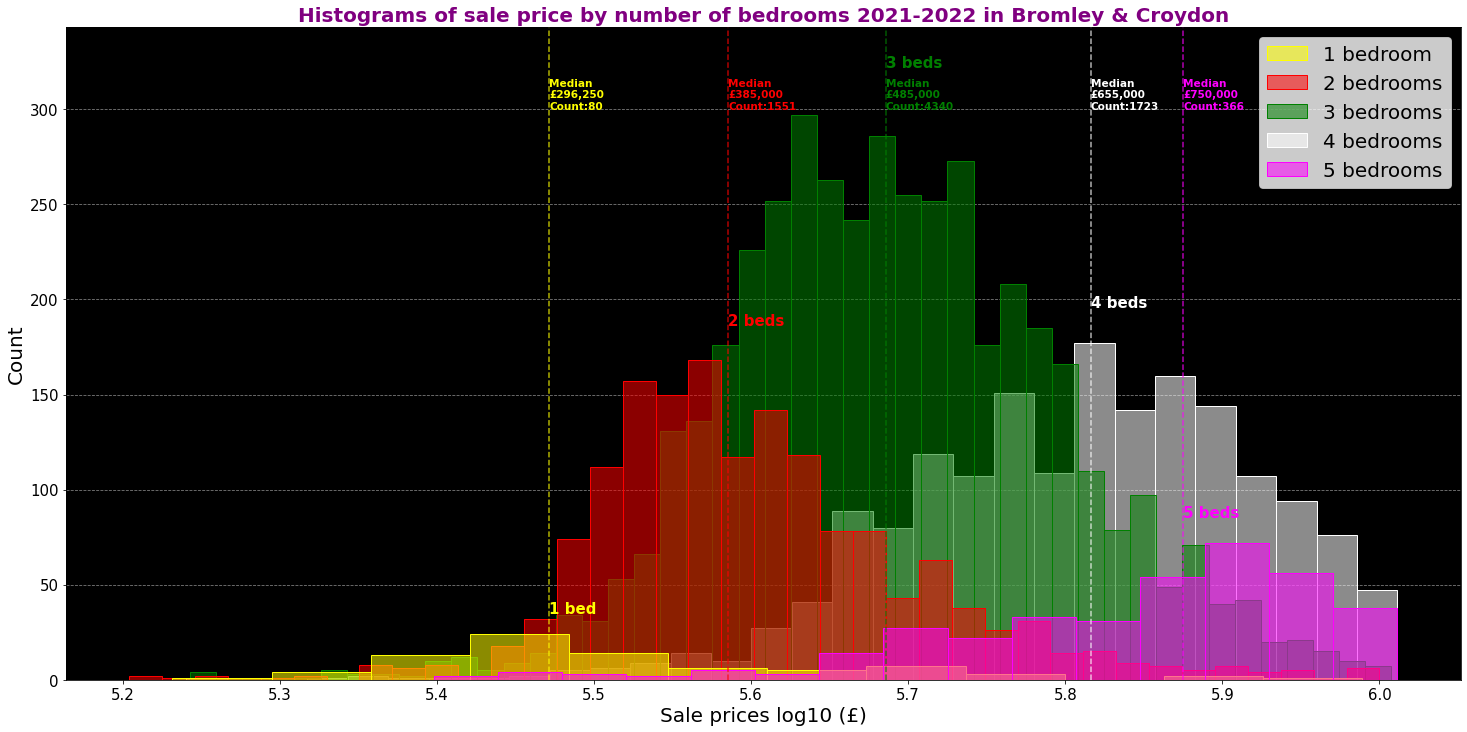

In [75]:
x = df.bedrooms[df.last_sold_price_gbp > 10**5]
y = np.log10(df.last_sold_price_gbp[df.last_sold_price_gbp > 10**5])


fig, ax = plt.subplots(figsize=(25,12))

#PLOTTING 

colours = ['yellow','red','green','white','magenta','aquamarine','pink','violet']

for num_bedrooms in x.unique()[:-3]:
    plot_colour = colours[int(num_bedrooms-1)]
    sns.histplot(y[df['bedrooms'] == num_bedrooms],
                color=plot_colour,
                #edgecolor='gray',
                edgecolor=plot_colour,
                alpha=0.55,
                label=f"{num_bedrooms:.0f} {'bedroom' if num_bedrooms == 1 else 'bedrooms'}",
                ax=ax)
    
    #MEDIAN LINES
    median_value = y[df['bedrooms'] == num_bedrooms].median()
    count_value = y[df['bedrooms'] == num_bedrooms].count()
    text_height = 300
    plt.axvline(median_value, linestyle='--', color=plot_colour, alpha=0.7)
    plt.text(x=median_value, y=text_height, s=f'Median\n£{10**median_value:,.0f}\nCount:{count_value}', color=plot_colour, alpha=1, fontdict={'fontsize':10.5,'fontweight':'bold'})
    
    #TEXT LABELS ABOVE PLOTS

    p = ax.patches #gets the bars in the histogram
    all_heights = [patch.get_height() for patch in p]
    new_heights = all_heights.copy()
    
        
    try:
        for element in all_previous_heights:
            if element in new_heights:
                new_heights.remove(element)
    except: 
        pass

    all_previous_heights = all_heights.copy()
    
    try:
        highest_point = max(new_heights)


        text_height = highest_point
        
        height_scaler = 1.05 
        ax.text(x=median_value,
                y=text_height * height_scaler + 10,
                s=f"{num_bedrooms:.0f} {'bed' if num_bedrooms == 1 else 'beds'}",
                c=plot_colour,
                fontsize=15.0,
                weight='bold',
                zorder=5
               )
    except:
        pass
    


#TITLES
    
ax.set_title('Histograms of sale price by number of bedrooms 2021-2022 in Bromley & Croydon',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'purple'})

#ADJUSTING AXES
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(top=top*1.1)   # set the ylim to bottom, top
#ylim(bottom, top)  


#AXIS LABELS 
label_fontsize = 20
ax.set_xlabel('Sale prices log10 (£)', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)

#TICK SIZES
tick_fontsize= 15
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)


#LEGEND

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, prop={'size': 20})


#GRID 

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')


#BACKGROUND COLOUR

ax.set_facecolor('black')

all_previous_heights=[]
plt.show()

The histograms above show:

- Increase in the median sale price as number of bedrooms increases of about £100,000
- Majority of sales in the period since 2021 were of 3 bedroom properties in these areas of London
- There is a an increase in frequency of sales from 1 bedroom to 3 bedrooms then a decrease as we approach 7 bedrooms which may be a result of the types of properties people are likely to want to buy freehold. e.g. new or small families possibly purchase freehold more often as an indication of financial stability and these sorts of properties would likely be larger
- Properties with 8 or 9 bedrooms are extreme outliers so have been removed from this plot

## By  Postcode

### Tableau Visualisation

Displays average property prices by postcode as well as the whole area covered by the dataset

https://prod-uk-a.online.tableau.com/t/oscarmumford/views/Grouped_area_bromley_croydon/AveragePriceDashboard2/c27b4af1-010f-40d5-824c-80934144790d/f5d07c4f-2d25-4abc-a098-e7660f127c71?:display_count=n&:showVizHome=n&:origin=viz_share_link

In [66]:
#df.groupby(['postcode_half1','bedrooms']).agg(['mean','std'])['last_sold_price_gbp']

In [67]:
avg_last_sold_by_postcode = df.groupby('postcode_half1').mean()['last_sold_price_gbp']
avg_last_sold_by_postcode.sort_values()

postcode_half1
CR7    425824.538674
CR0    439194.933384
CR4    461804.305857
BR5    488366.557960
BR1    512402.213974
CR2    535974.021002
CR5    564128.937622
BR6    568423.175103
BR2    577939.623116
CR8    605305.273782
BR7    624728.360996
BR3    627279.237020
BR4    663490.562753
Name: last_sold_price_gbp, dtype: float64

/var/folders/q6/lwrvjh5x78jbrc_15wzqk_hc0000gp/T/ipykernel_47078/1527091536.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['£{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


''

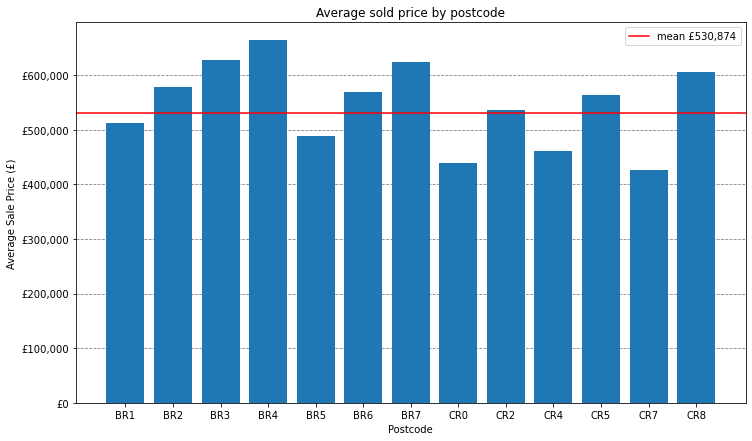

In [68]:
avg_last_sold_by_postcode = df.groupby('postcode_half1').mean()['last_sold_price_gbp']

x = avg_last_sold_by_postcode.index
y = avg_last_sold_by_postcode
mean_value = df.last_sold_price_gbp.mean()

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x,y) #y)
ax.axhline(y=mean_value, c='red', label=f'mean £{mean_value:,.0f}')

ax.legend()

ax.set_title('Average sold price by postcode')

ax.set_xlabel('Postcode')
ax.set_ylabel('Average Sale Price (£)')


ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 0)


ax.set_yticklabels(['£{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
;

# CURRENT DATA EDA

In [69]:
curr_df = pd.read_csv(curr_data)

In [70]:
curr_df

,address,address_no_code,postcode_first_half,bedrooms,bathrooms,lounges,url,nearby_station_1,distance_to_station_1_miles,nearby_station_2,distance_to_station_2_miles,price_gbp
0,"Park Street, Chelsea/London SW6","Park Street, Chelsea/London",SW6,2,2,1,/new-homes/details/61623573/?search_identifier...,Imperial Wharf,0.1,Chelsea Harbour Pier,0.2,1375000.0
1,"Bridges Court, London SW11","Bridges Court, London",SW11,1,1,1,/for-sale/details/61567435/?search_identifier=...,Chelsea Harbour Pier,0.4,Imperial Wharf,0.4,440000.0
2,"Carshalton Grove, Sutton SM1","Carshalton Grove, Sutton",SM1,3,2,2,/for-sale/details/61623414/?search_identifier=...,Carshalton,0.6,Sutton (London),0.6,650000.0
3,"Rutland Rd, Forest Gate E7","Rutland Rd, Forest Gate",E7,3,1,2,/for-sale/details/61623411/?search_identifier=...,East Ham,0.4,Upton Park,0.5,545000.0
4,"Rutland Rd, Forest Gate E7","Rutland Rd, Forest Gate",E7,3,1,2,/for-sale/details/61623405/?search_identifier=...,East Ham,0.4,Upton Park,0.5,545000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Burlington Road, Osterley, Isleworth TW7","Burlington Road, Osterley, Isleworth",TW7,3,1,2,/for-sale/details/61476741/?search_identifier=...,Osterley,0.3,Hounslow East,0.5,750000.0
9996,"Tufnell Park, Tufnell Park, London N7","Tufnell Park, Tufnell Park, London",N7,1,1,2,/for-sale/details/61476757/?search_identifier=...,Upper Holloway,0.5,Tufnell Park,0.5,375000.0
9997,"Holmewood Gardens, Brixton Hill, London SW2","Holmewood Gardens, Brixton Hill, London",SW2,2,1,2,/for-sale/details/61476758/?search_identifier=...,Streatham Hill,0.6,Tulse Hill,0.8,700000.0
9998,"Coldershaw Road, Ealing W13","Coldershaw Road, Ealing",W13,2,1,1,/for-sale/details/61476750/?search_identifier=...,West Ealing,0.5,Drayton Green,0.6,535000.0


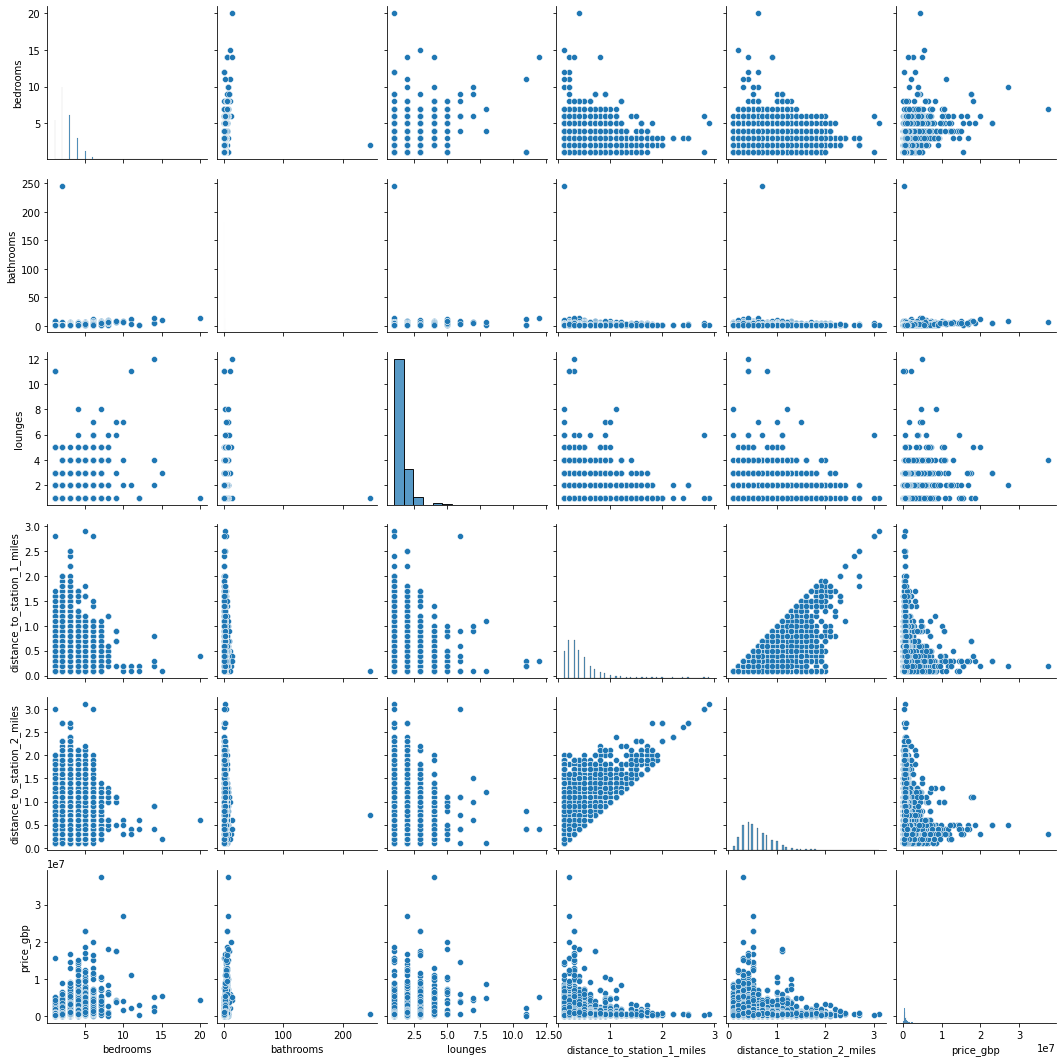

In [71]:
sns.pairplot(curr_df)

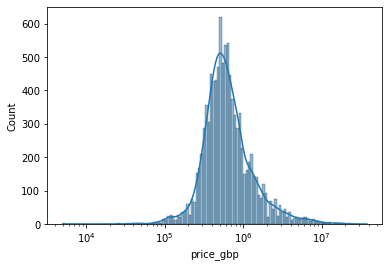

In [72]:
sns.histplot(curr_df.price_gbp, log_scale=10, kde=True);

In [73]:
curr_df.price_gbp

0       1375000.0
1        440000.0
2        650000.0
3        545000.0
4        545000.0
          ...    
9995     750000.0
9996     375000.0
9997     700000.0
9998     535000.0
9999     950000.0
Name: price_gbp, Length: 10000, dtype: float64

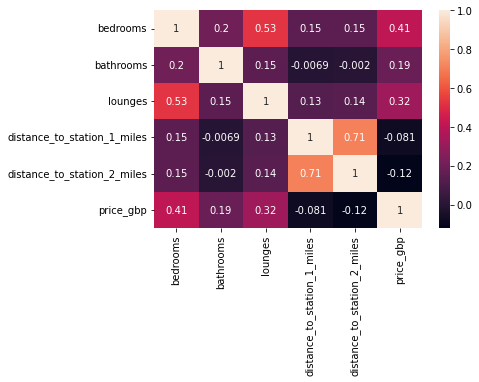

In [74]:
sns.heatmap(curr_df.corr(), annot=True);